In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../..")
import os

import numpy as np
import matplotlib.pyplot as plt

from torchgeo.datasets import NAIP
from torchgeo.samplers import RandomGeoSampler

In [2]:
!mkdir -p tmp/
!wget -P tmp/ "http://naipblobs.blob.core.windows.net/naip/v002/md/2017/md_100cm_2017/38075/m_3807501_ne_18_1_20170709.tif"
!wget -P tmp/ "http://naipblobs.blob.core.windows.net/naip/v002/md/2017/md_100cm_2017/38075/m_3807501_nw_18_1_20170609.tif"
!wget -P tmp/ "http://naipblobs.blob.core.windows.net/naip/v002/md/2017/md_100cm_2017/38075/m_3807501_se_18_1_20170709.tif"

--2021-07-31 06:51:45--  http://naipblobs.blob.core.windows.net/naip/v002/md/2017/md_100cm_2017/38075/m_3807501_ne_18_1_20170709.tif
Resolving naipblobs.blob.core.windows.net (naipblobs.blob.core.windows.net)... 52.239.169.132
Connecting to naipblobs.blob.core.windows.net (naipblobs.blob.core.windows.net)|52.239.169.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198213171 (189M) [application/octet-stream]
Saving to: ‘tmp/m_3807501_ne_18_1_20170709.tif’

m_3807501_ne_18_1_2 100%[===================>] 189.03M   111MB/s    in 1.7s    

2021-07-31 06:51:47 (111 MB/s) - ‘tmp/m_3807501_ne_18_1_20170709.tif’ saved [198213171/198213171]

--2021-07-31 06:51:47--  http://naipblobs.blob.core.windows.net/naip/v002/md/2017/md_100cm_2017/38075/m_3807501_nw_18_1_20170609.tif
Resolving naipblobs.blob.core.windows.net (naipblobs.blob.core.windows.net)... 52.239.169.132
Connecting to naipblobs.blob.core.windows.net (naipblobs.blob.core.windows.net)|52.239.169.132|:80... con

## Visualization example

In [2]:
def show_image(sample):
    im = sample["image"]
    im = np.rollaxis(im.numpy(),0,3).copy() # convert to HxWxC format
    im = im[:,:,:3]
        
    plt.figure(figsize=(4,4))
    plt.imshow(im)
    plt.axis("off")
    plt.show()
    plt.close()

In [3]:
ds = NAIP(
    "tmp/",
    crs="EPSG:26918"
)

In [6]:
sampler = RandomGeoSampler(
    roi=ds.bounds,
    size=256,
    length=5
)

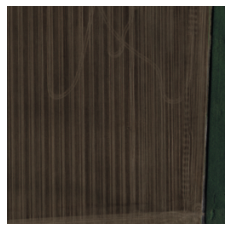

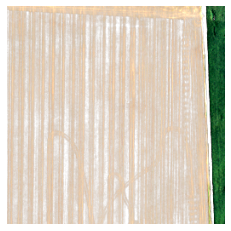

--


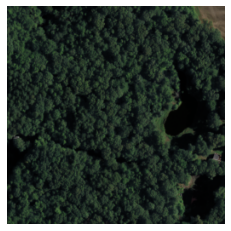

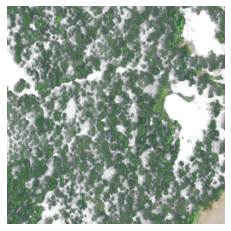

--


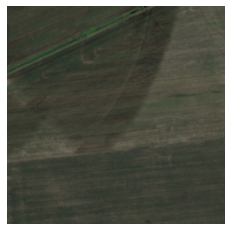

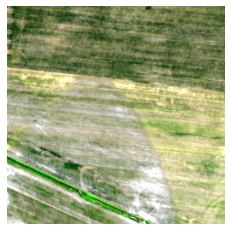

--
Error


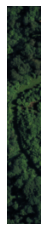

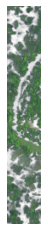

--


In [11]:
for bounds in sampler:
    try:
        sample = ds[bounds]
        show_image(sample)
        ds.plot(sample["image"])
        print("--")
    except StopIteration:
        print("Error")